# I. Relevant imports

In [1]:
from sklearn.impute import KNNImputer
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from forex_python.converter import CurrencyRates
from code_ref import usd_conv

# II.Data Cleaning

Loading main dataset resulting from API pull

In [38]:
findata = pd.read_csv('metric_final_set.csv')

Some primary feature selection - we are looking to simplify the dimensionality of the dataset and focus on key investment features
    
 - This list is not exhaustive and may have some selection bias. We believe these metrics can lead us to extract information from company clusters.

In [40]:
findata1 = findata[['symbol','metric.netIncomeEmployeeAnnual', 'metric.revenueEmployeeAnnual','metric.receivablesTurnoverAnnual','metric.freeOperatingCashFlow/revenue5Y',
"metric.freeOperatingCashFlow/revenueTTM", 'metric.grossMargin5Y', 'metric.grossMarginAnnual',
'metric.netProfitMargin%Annual',
'metric.netProfitMargin5Y',
'metric.dividendGrowthRate5Y',
'metric.focfCagr5Y',
'metric.revenueGrowth5Y',
'metric.totalDebtCagr5Y',
'metric.netDebtAnnual',
'metric.peNormalizedAnnual',
'metric.pfcfShareAnnual',
'metric.currentEv/freeCashFlowAnnual',
'metric.freeCashFlowAnnual',
'metric.longTermDebt/equityAnnual',
'metric.netInterestCoverageAnnual',
'metric.payoutRatioAnnual',
'metric.quickRatioAnnual',
'metric.totalDebt/totalEquityAnnual',
'metric.dividendYield5Y',
'metric.dividendYieldIndicatedAnnual',
'metric.capitalSpendingGrowth5Y',
'metric.inventoryTurnoverAnnual',
]]

findata1.shape

(8831, 28)

Preliminary data observation highlight a large number of null values

In [41]:
findata1.sample(n=10)

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.freeCashFlowAnnual,metric.longTermDebt/equityAnnual,metric.netInterestCoverageAnnual,metric.payoutRatioAnnual,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual
5667,AGM.L,-91325.580,2883.721,24.80000,-2134.18000,-3551.81800,-95.23810,-280.64520,-3166.93600,-1980.21200,...,-4.308,0.00000,NaN,NaN,7.68278,0.00000,NaN,NaN,-7.76498,8.74074
6829,1199.HK,NaN,NaN,5.85752,NaN,NaN,31.14261,26.53840,34.05316,47.09472,...,NaN,62.89902,NaN,40.18956,1.24526,73.81315,4.04474,8.47222,NaN,57.66156
7069,5OX.SI,NaN,NaN,31.39576,-71.01442,-289.41460,94.40426,92.12155,-2.27349,-33.08896,...,-30.808,NaN,-0.90566,NaN,0.55713,NaN,NaN,NaN,97.27669,1.59453
5797,ALVIV.PA,6451.935,203766.500,123.13620,2.97964,0.39375,43.97154,47.35352,3.16634,2.38547,...,2.536,137.74540,12.33750,0.00000,1.37386,137.86540,0.00000,NaN,12.94336,586.53920
2511,LASP.CO,415765.100,2246793.000,NaN,150.92400,257.86950,NaN,NaN,18.50483,17.13988,...,2443.749,10.42943,NaN,19.81340,NaN,10.42943,2.03963,2.22222,22.76330,NaN
3488,SENS.ST,NaN,NaN,6.10684,3.59168,-6.77856,38.42122,35.69729,-3.71894,-3.28513,...,-3.740,13.92368,-7.77558,NaN,0.87229,28.82340,0.00000,NaN,NaN,3.09566
1576,0762.HK,NaN,NaN,16.97528,2.64411,9.99466,58.04683,72.06306,3.91443,2.46336,...,31780.520,8.87370,NaN,NaN,0.39591,16.93064,NaN,3.34513,-3.77666,34.19465
2670,MICT,NaN,NaN,0.94455,-29.12731,-807.96640,24.81968,-77.35849,-1000.00000,-43.07917,...,-3.854,57.21332,-9.97165,NaN,15.23103,57.21332,NaN,NaN,-24.34643,0.38941
5371,XNCR,166925.500,973291.900,9.86745,10.19843,34.03701,NaN,NaN,17.15061,-9.17617,...,53.336,0.00000,NaN,0.00000,NaN,0.00000,NaN,NaN,37.02532,NaN
4875,AUSS.OL,NaN,NaN,9.80519,1.99536,0.90221,46.23970,46.17140,9.41422,13.12947,...,210.590,62.35157,NaN,72.32795,1.43433,77.99595,5.03910,6.03217,9.20486,1.66915


# III. Currency Conversion - Net Debt & Free Cash Flow

Net Debt / Free Cash Flow are in local CCY. We need to convert them into USD to include these features in the clusters.

In [42]:
tick_conv = pd.read_csv('tickers_final.csv')

In [43]:
conv = pd.merge(findata1, tick_conv, left_on = 'symbol', right_on = 'Ticker').drop(columns = ['Ticker', 'Unnamed: 0'])

In [44]:
conv.sample()

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual,Name,Exchange,Category Name,Country
6008,PMY.AX,NaN,NaN,0.52295,-2632.244,-1585.943,-329.8638,-376.2395,-3188.482,-2281.323,...,NaN,0.0,NaN,NaN,48.26861,NaN,Pacifico Minerals Limited,ASX,Industrial Metals & Minerals,Australia


In [45]:
country_ccy = pd.DataFrame(conv.Country.unique(), columns = ['country'])

In [46]:
mapping = {'USA': 'USD', 'Australia': 'AUD', 'Germany': 'EUR', 'France': 'EUR', 'Canada':'CAD',
           'United Kingdom': 'GBP', 'Norway': 'NOK', 'Sweden': 'SEK', 'Denmark': 'DKK', 'Singapore': 'SGD', 'Netherlands':'EUR', 'Hong Kong':'HKD', 'Spain': 'EUR', 'Italy':'EUR', 'Belgium': 'EUR'}

In [47]:
country_ccy['ccy'] = country_ccy.country.map((mapping))

In [48]:
country_ccy['ref_ccy'] = 'USD'

In [49]:
def usd_conv(row):
    c = CurrencyRates()
    return c.get_rate(row['ref_ccy'],row ['ccy'])

In [50]:
country_ccy['rate_vs_usd'] = country_ccy.apply(usd_conv, axis =1)
country_ccy

,country,ccy,ref_ccy,rate_vs_usd
0,USA,USD,USD,1.000000
1,Australia,AUD,USD,1.605227
2,Germany,EUR,USD,0.920217
3,France,EUR,USD,0.920217
4,Canada,CAD,USD,1.404712
5,United Kingdom,GBP,USD,0.805788
6,Norway,NOK,USD,10.319591
7,Sweden,SEK,USD,10.072237
8,Denmark,DKK,USD,6.870065
9,Singapore,SGD,USD,1.424404


In [51]:
df_w_rate = pd.merge(conv, country_ccy, left_on = 'Country', right_on = 'country')
df_w_rate[['metric.freeCashFlowAnnual','metric.netDebtAnnual']] = df_w_rate[['metric.freeCashFlowAnnual','metric.netDebtAnnual']].divide(df_w_rate['rate_vs_usd'], axis = 0)

In [52]:
df_w_rate.sample(n=10)

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual,Name,Exchange,Category Name,Country,country,ccy,ref_ccy,rate_vs_usd
3346,SYD.AX,432160.8,3295679.0,8.27663,-0.81905,12.08831,NaN,NaN,13.11295,21.02834,...,3.67691,NaN,Sydney Airport Limited,ASX,"Air Services, Other",Australia,Australia,AUD,USD,1.605227
7574,1224.HK,NaN,NaN,74.64781,NaN,NaN,41.41611,98.34566,73.32565,22.92540,...,NaN,NaN,C C LAND,HKG,Property Management,Hong Kong,Hong Kong,HKD,USD,7.753658
3641,SXY.AX,17762.8,519013.5,3.72553,-60.82412,-96.85029,36.88529,56.07362,3.42242,-55.16901,...,-6.04762,3.99953,Senex Energy Limited,ASX,Independent Oil & Gas,Australia,Australia,AUD,USD,1.605227
7439,2331.HK,NaN,NaN,17.17069,NaN,NaN,47.42136,49.06737,10.80882,6.08388,...,NaN,5.33749,LI NING,HKG,Textile - Apparel Clothing,Hong Kong,Hong Kong,HKD,USD,7.753658
7687,0925.HK,166031.5,796528.6,43.80000,3.29962,-3.20165,75.42662,67.61465,20.84438,60.29735,...,NaN,0.40883,BJ PROPERTIES,HKG,Personal Products,Hong Kong,Hong Kong,HKD,USD,7.753658
6095,TAN.L,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Tanfield Group plc,LSE,Asset Management,United Kingdom,United Kingdom,GBP,USD,0.805788
1803,DKL,NaN,NaN,33.57241,0.87151,6.73212,27.12944,25.90532,16.56684,13.67766,...,0.12839,47.79180,"Delek Logistics Partners, LP",NYQ,Independent Oil & Gas,USA,USA,USD,USD,1.000000
7349,1600.HK,NaN,NaN,4.81270,NaN,NaN,26.38052,26.01911,12.42193,12.65662,...,NaN,23.92445,TIAN LUN GAS,HKG,Oil & Gas Equipment & Services,Hong Kong,Hong Kong,HKD,USD,7.753658
7897,0544.HK,NaN,NaN,4.87335,-9.58972,29.55063,14.77718,14.66341,-12.26661,-8.39951,...,-9.31641,277.78950,DAIDO GROUP,HKG,Business Services,Hong Kong,Hong Kong,HKD,USD,7.753658
1981,XPL,-939714.3,116571.4,NaN,-1018.35200,-648.03920,NaN,NaN,-806.12740,-1426.26400,...,-69.70697,NaN,Solitario Zinc Corp.,ASE,Gold,USA,USA,USD,USD,1.000000


In [53]:
df_w_rate.shape

(8647, 36)

# IV. KNN Imputation

   - We elected KNNImputer to fill in missing values with the rationale that similar companies in terms of ratios would be grouped within the matrix dimensions and provide accurate inputs that would not affect the clustering outcomes. 20 nearest neighbors should preserve the accuracy of the data and avoid adding too much variance to the data.

In [19]:
Xalt = df_w_rate.iloc[:,1:28]

In [21]:
imputer = KNNImputer(n_neighbors = 20)
complete1 = imputer.fit_transform(Xalt)


In [23]:
df = pd.DataFrame(complete1, index = [df_w_rate.index, df_w_rate.iloc[:,0]], columns = Xalt.columns).reset_index()
df.drop(columns = ['level_0'], inplace = True)

We now have a complete DataSet to start modelling on. 

In [58]:
df.sample(n=10)

,symbol,metric.netIncomeEmployeeAnnual,metric.revenueEmployeeAnnual,metric.receivablesTurnoverAnnual,metric.freeOperatingCashFlow/revenue5Y,metric.freeOperatingCashFlow/revenueTTM,metric.grossMargin5Y,metric.grossMarginAnnual,metric.netProfitMargin%Annual,metric.netProfitMargin5Y,...,metric.freeCashFlowAnnual,metric.longTermDebt/equityAnnual,metric.netInterestCoverageAnnual,metric.payoutRatioAnnual,metric.quickRatioAnnual,metric.totalDebt/totalEquityAnnual,metric.dividendYield5Y,metric.dividendYieldIndicatedAnnual,metric.capitalSpendingGrowth5Y,metric.inventoryTurnoverAnnual
8215,0573.HK,1.357436e+04,5.166059e+05,92.85311,1.504420,6.59646,11.193840,11.15107,2.62760,3.394770,...,7.597188,0.023810,-3.099474,100.447600,1.272810,9.012020,5.744990,9.693880,-24.799130,24.141970
4903,GECP.PA,-5.215732e+05,5.373228e+05,3.15178,-2.375900,-8.98335,30.456600,28.90104,-12.80392,-11.666460,...,-1.671345,23.649733,-15.831860,21.691418,2.214786,50.375984,2.999266,6.427396,2.584351,12.796201
7776,0176.HK,-3.376735e+05,4.406772e+05,4.39105,-1882.108508,-63.94258,25.593342,17.71140,-76.62604,-620.535569,...,-72.719097,21.278640,-2.227440,60.890062,0.587840,61.210220,2.678761,5.908495,26.107476,0.364270
6935,A26.SI,1.231391e+06,5.233951e+06,16.32786,4.007040,4.84947,68.559000,64.25344,61.76161,41.687380,...,39.931082,77.789570,4.961640,4.173320,3.775200,80.289460,1.374300,2.533330,-6.307640,386.059800
351,TEAM,-2.039082e+05,3.869930e+05,18.01857,29.919230,35.69854,81.946640,82.62290,-52.69042,-20.892300,...,420.040000,0.000000,-8.512970,42.203786,2.455435,150.950600,2.476332,4.908444,35.175800,13.163580
1590,CIR,1.691400e+04,9.668020e+05,5.68053,2.036430,0.21342,31.324580,32.02373,-2.56846,-0.678590,...,2.058000,163.266000,1.245720,94.938721,1.852180,163.394700,3.724667,8.856866,1.580770,4.665660
5041,OGD.TO,-2.749604e+03,1.210888e+05,4.42004,-2.158260,-3.39812,9.240970,10.45389,-2.27073,-1.954350,...,-6.397043,36.794820,-0.461760,55.068035,1.372610,38.623070,2.902916,4.938711,21.822530,3.283010
8034,0270.HK,1.368600e+05,5.207029e+05,12.22145,12.109303,40.14945,59.220730,52.47271,33.82848,42.180570,...,162.581406,17.859780,152.534289,74.912440,1.430030,21.406440,3.735740,3.853330,8.529085,0.725470
6233,WAND.L,-1.109258e+05,1.015354e+05,3.81207,-113.594900,-93.07527,88.926220,90.92779,-109.24850,-156.015200,...,-17.136402,0.709940,-1022.172247,23.758524,4.408164,29.614600,2.727863,6.830089,-6.366810,12.589138
8547,RWAY.MI,-5.894832e+04,4.103989e+05,3.02734,10.198950,7.22598,85.950000,99.45799,28.59079,24.016860,...,17.387200,14.440830,69.384620,99.919240,1.078200,21.769820,3.993620,4.667330,19.420410,1.343840


In [59]:
df.to_csv('clean_data.csv')

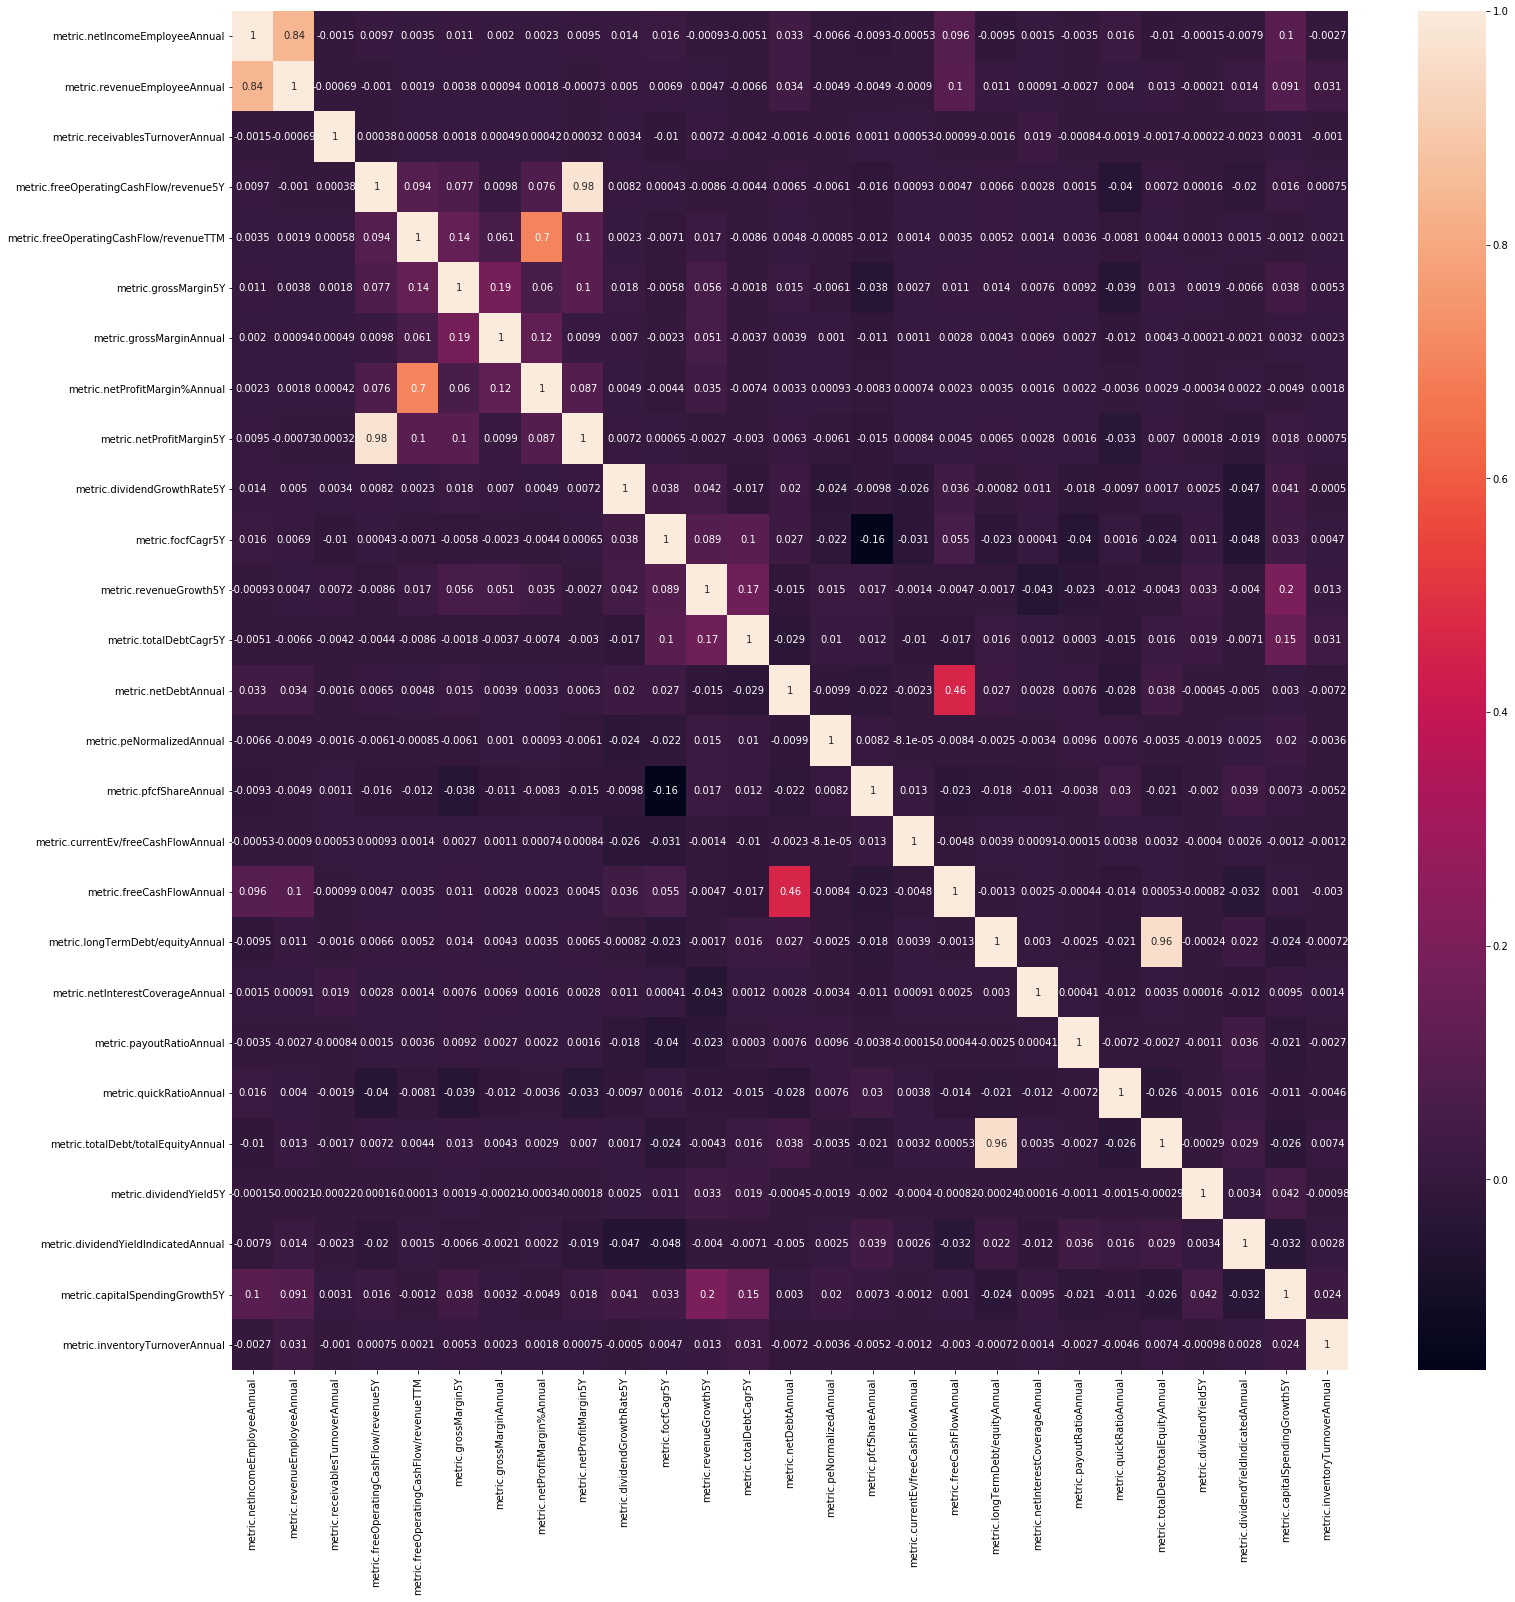

In [25]:
plt.figure(figsize = [25,25])
corr = sns.heatmap(df.iloc[:,1:28].corr(), annot=True);

In [60]:
plt.savefig('visualizations/clean_data_corr_hm.png')

<Figure size 432x288 with 0 Axes>